# Python之ML--降维压缩数据

主要知识点如下：
- 无监督数据压缩--主成分分析(Principal Component Analysis,PCA)
- 基于类别可分最大化的监督降维技术--线性判别分析(Linear Discriminant Analysis,LDA)
- 通过核主成分分析(kernel principal component analysis)进行非线性降维

In [5]:
import pandas as pd

df_wine=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',header=None)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X,y=df_wine.iloc[:,1:].values,df_wine.iloc[:,0].values

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

sc=StandardScaler()

X_train_std=sc.fit_transform(X_train)
X_test_std=sc.fit_transform(X_test)

In [7]:
import numpy as np

cov_mat=np.cov(X_train_std.T)

eigen_vals,eigen_vecs=np.linalg.eig(cov_mat)

print("\nEigenvalues \n%s"%eigen_vals)


Eigenvalues 
[4.8923083  2.46635032 1.42809973 1.01233462 0.84906459 0.60181514
 0.52251546 0.08414846 0.33051429 0.29595018 0.16831254 0.21432212
 0.2399553 ]


In [9]:
tot=sum(eigen_vals)

var_exp=[(i/tot) for i in sorted(eigen_vals,reverse=True)]

cum_var_exp=np.cumsum(var_exp)

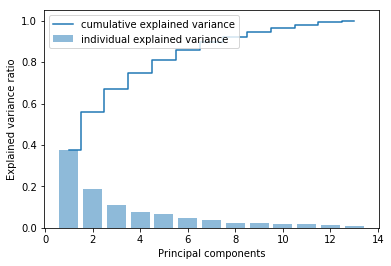

In [13]:
import matplotlib.pyplot as plt

plt.bar(range(1,14),var_exp,alpha=0.5,align='center',label='individual explained variance')

plt.step(range(1,14),cum_var_exp,where='mid',label='cumulative explained variance')

plt.xlabel('Principal components')
plt.ylabel('Explained variance ratio')
plt.legend(loc='upper left')

plt.show()

In [14]:
eigen_pairs=[(np.abs(eigen_vals[i]),eigen_vecs[:,i]) for i in range(len(eigen_vals))]

eigen_pairs.sort(reverse=True)

In [16]:
w=np.hstack((eigen_pairs[0][1][:,np.newaxis],eigen_pairs[1][1][:,np.newaxis]))

print('Matrix W:\n',w)

Matrix W:
 [[ 0.14669811  0.50417079]
 [-0.24224554  0.24216889]
 [-0.02993442  0.28698484]
 [-0.25519002 -0.06468718]
 [ 0.12079772  0.22995385]
 [ 0.38934455  0.09363991]
 [ 0.42326486  0.01088622]
 [-0.30634956  0.01870216]
 [ 0.30572219  0.03040352]
 [-0.09869191  0.54527081]
 [ 0.30032535 -0.27924322]
 [ 0.36821154 -0.174365  ]
 [ 0.29259713  0.36315461]]


In [17]:
X_train_std[0].dot(w)

array([2.59891628, 0.00484089])

In [18]:
X_train_pca=X_train_std.dot(w)

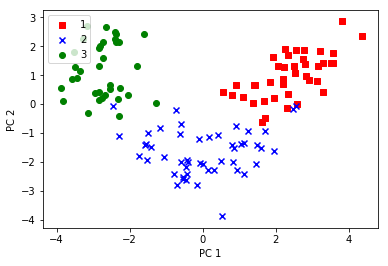

In [21]:
colors=['r','b','g']
markers=['s','x','o']

for l,c,m in zip(np.unique(y_train),colors,markers):
    plt.scatter(X_train_pca[y_train==l,0],X_train_pca[y_train==l,1],c=c,label=l,marker=m)
    
plt.xlabel('PC 1')
plt.ylabel('PC 2')

plt.legend(loc='upper left')

plt.show()

In [22]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X,y,classifier,resolution=0.02):
    # setup marker generator and color map
    markers=('s','x','o','^','v')
    colors=('red','blue','lightgreen','gray','cyan')
    cmap=ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min,x1_max=X[:,0].min()-1,X[:,1].max()+1
    x2_min,x2_max=X[:,1].min()-1,X[:,1].max()+1
    xx1,xx2=np.meshgrid(np.arange(x1_min,x1_max,resolution),np.arange(x2_min,x2_max,resolution))
    
    Z=classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z=Z.reshape(xx1.shape)
    
    plt.contourf(xx1,xx2,Z,alpha=0.4,cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    # plot class samples
    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0],y=X[y==cl,1],alpha=0.8,c=cmap(idx),marker=markers[idx],label=cl)

E:\Anaconda\envs\mytensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\envs\mytensorflow\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA

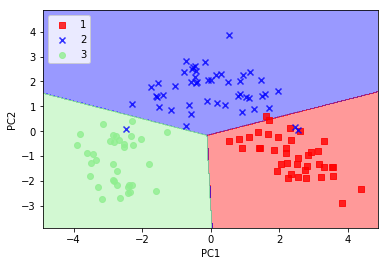

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
lr=LogisticRegression()

X_train_pca=pca.fit_transform(X_train_std)
X_test_pca=pca.transform(X_test_std)

lr.fit(X_train_pca,y_train)

plot_decision_regions(X_train_pca,y_train,classifier=lr)

plt.xlabel('PC1')
plt.ylabel('PC2')

plt.legend(loc='upper left')

plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


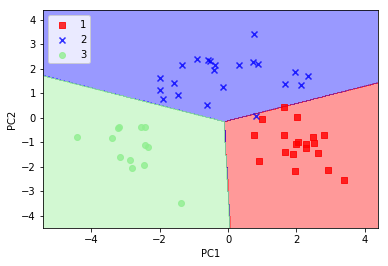

In [25]:
plot_decision_regions(X_test_pca,y_test,classifier=lr)

plt.xlabel('PC1')
plt.ylabel('PC2')

plt.legend(loc='upper left')

plt.show()

In [26]:
np.set_printoptions(precision=4)

mean_vecs=[]

for label in range(1,4):
    mean_vecs.append(np.mean(X_train_std[y_train==label],axis=0))
    print('MV %s:%s\n'%(label,mean_vecs[label-1]))

MV 1:[ 0.9259 -0.3091  0.2592 -0.7989  0.3039  0.9608  1.0515 -0.6306  0.5354
  0.2209  0.4855  0.798   1.2017]

MV 2:[-0.8727 -0.3854 -0.4437  0.2481 -0.2409 -0.1059  0.0187 -0.0164  0.1095
 -0.8796  0.4392  0.2776 -0.7016]

MV 3:[ 0.1637  0.8929  0.3249  0.5658 -0.01   -0.9499 -1.228   0.7436 -0.7652
  0.979  -1.1698 -1.3007 -0.3912]



In [27]:
d=13

S_W=np.zeros((d,d))

for label,mv in zip(range(1,4),mean_vecs):
    class_scatter=np.zeros((d,d))
    for row in X[y==label]:
        row,mv=row.reshape(d,1),mv.reshape(d,1)
        class_scatter+=(row-mv).dot((row-mv).T)
    S_W+=class_scatter
    
print('Within-class scatter matrix:%sx%s'%(S_W.shape[0],S_W.shape[1]))

Within-class scatter matrix:13x13


In [28]:
print('Class label distribution:%s'%np.bincount(y_train)[1:])

Class label distribution:[40 49 35]


In [29]:
d=13

S_W=np.zeros((d,d))

for label,mv in zip(range(1,4),mean_vecs):
    class_scatter=np.cov(X_train_std[y_train==label].T)
    S_W+=class_scatter
    
print('Scaled Within-class scatter matrix:%sx%s'%(S_W.shape[0],S_W.shape[1]))

Scaled Within-class scatter matrix:13x13


In [32]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda=LDA(n_components=2)

X_train_lda=lda.fit_transform(X_train_std,y_train)

E:\Anaconda\envs\mytensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\envs\mytensorflow\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA

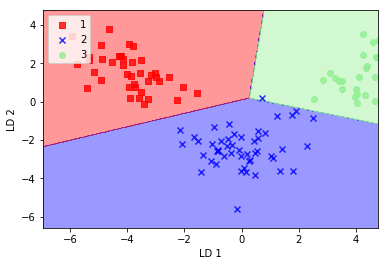

In [34]:
lr=LogisticRegression()

lr=lr.fit(X_train_lda,y_train)

plot_decision_regions(X_train_lda,y_train,classifier=lr)

plt.xlabel('LD 1')
plt.ylabel('LD 2')

plt.legend(loc='upper left')

plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


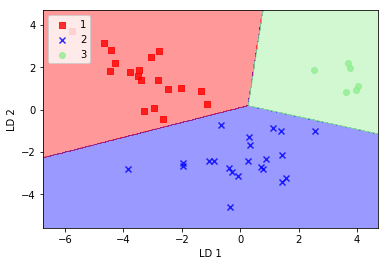

In [35]:
X_test_lda=lda.transform(X_test_std)

plot_decision_regions(X_test_lda,y_test,classifier=lr)

plt.xlabel('LD 1')
plt.ylabel('LD 2')

plt.legend(loc='upper left')

plt.show()

In [36]:
from scipy.spatial.distance import pdist,squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np

def rbf_kernel_pca(X,gamma,n_components):
    sq_dists=pdist(X,'sqeuclidean')
    
    mat_sq_dists=squareform(sq_dists)
    
    K=exp(-gamma*mat_sq_dists)
    
    N=K.shape[0]
    
    one_n=np.ones(N,N)/N
    K=K-one_n.dot(K)-K.dot(one_n)+one_n.dot(K).dot(one_n)
    
    eigvals,eigvecs=eigh(K)
    
    X_pc=np.column_stack((eigvecs[:,-i] for i in range(1,n_components+1)))
    
    return X_pc

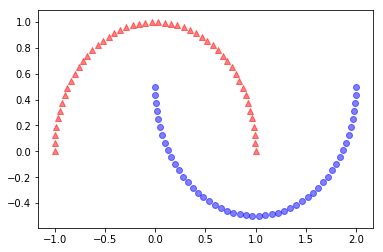

In [37]:
from sklearn.datasets import make_moons

X,y=make_moons(n_samples=100,random_state=123)

plt.scatter(X[y==0,0],X[y==0,1],color='red',marker='^',alpha=0.5)
plt.scatter(X[y==1,0],X[y==1,1],color='blue',marker='o',alpha=0.5)

plt.show()

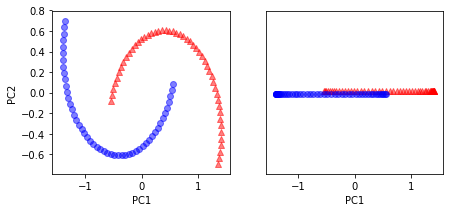

In [40]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)

X_pca=pca.fit_transform(X)

fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(7,3))

ax[0].scatter(X_pca[y==0,0],X_pca[y==0,1],color='red',marker='^',alpha=0.5)
ax[0].scatter(X_pca[y==1,0],X_pca[y==1,1],color='blue',marker='o',alpha=0.5)

ax[1].scatter(X_pca[y==0,0],np.zeros((50,1))+0.02,color='red',marker='^',alpha=0.5)
ax[1].scatter(X_pca[y==1,0],np.zeros((50,1))-0.02,color='blue',marker='o',alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')

ax[1].set_ylim([-1,1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

plt.show()

In [42]:
from matplotlib.ticker import FormatStrFormatter

X_kpca=rbf_kernel_pca(X,gamma=15,n_components=2)

fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(7,3))

ax[0].scatter(X_kpca[y==0,0],X_kpca[y==0,1],color='red',marker='^',alpha=0.5)
ax[0].scatter(X_kpca[y==1,0],X_kpca[y==1,1],color='blue',marker='o',alpha=0.5)

ax[1].scatter(X_kpca[y==0,0],np.zeros((50,1))+0.02,color='red',marker='^',alpha=0.5)
ax[1].scatter(X_kpca[y==1,0],np.zeros((50,1))-0.02,color='blue',marker='o',alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')

ax[1].set_ylim([-1,1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

ax[0].xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
ax[1].xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))

plt.show()

TypeError: data type not understood